In [209]:
import pandas as pd
#from tensorflow.keras.models import Sequential
#from tensorflow.keras import layers
#from tensorflow import feature_column
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import metpy
from metpy import calc
from sklearn.preprocessing import normalize,scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [278]:
data = pd.read_csv("PM2.5_dataset1.csv")

In [283]:
data['TMP'] = data['TMP']-273
data['TMP']

0         9.81880
1         8.63130
2         7.13130
3        15.19380
4        12.19380
           ...   
31565     0.49664
31566    24.60638
31567    24.60638
31568    25.64655
31569    10.69052
Name: TMP, Length: 31570, dtype: float64

In [289]:
x = data.iloc[:,1:6].values
x

array([[ 3.1600000e+01, -2.1066227e+00, -1.7975826e+00,  2.5661905e+02,
         9.8188000e+00],
       [ 6.2200000e+01,  1.2058773e+00,  1.7649174e+00,  3.3749405e+02,
         8.6313000e+00],
       [ 6.1500000e+01,  1.5183773e+00,  1.0149174e+00,  2.7061905e+02,
         7.1313000e+00],
       ...,
       [ 8.9000010e+00,  2.2149315e+00,  4.6820517e+00,  8.4238837e+02,
         2.4606380e+01],
       [ 8.3000000e+00,  1.3865433e+00,  5.4654720e+00,  1.2920718e+03,
         2.5646550e+01],
       [ 4.4100002e+01, -3.2195606e+00, -4.2653933e+00,  9.8089050e+02,
         1.0690520e+01]])

In [282]:
#x['TMP'] = x['TMP'] - 273
#print(x.head())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [269]:
x.drop(['indedx'],axis =1)

,air_data_value,RH,UGRD,VGRD,HPBL,TMP
0,17.0,31.600000,-2.106623,-1.797583,256.61905,9.81880
1,13.0,62.200000,1.205877,1.764917,337.49405,8.63130
2,21.0,61.500000,1.518377,1.014917,270.61905,7.13130
3,6.0,15.400001,2.080877,-1.610083,1009.30660,15.19380
4,7.0,50.700000,2.393377,-1.172583,460.43155,12.19380
...,...,...,...,...,...,...
31565,6.3,25.500000,0.723850,-2.034275,892.42080,0.49664
31566,6.4,8.100000,6.964932,4.869552,1664.20080,24.60638
31567,8.5,8.900001,2.214932,4.682052,842.38837,24.60638
31568,8.1,8.300000,1.386543,5.465472,1292.07180,25.64655


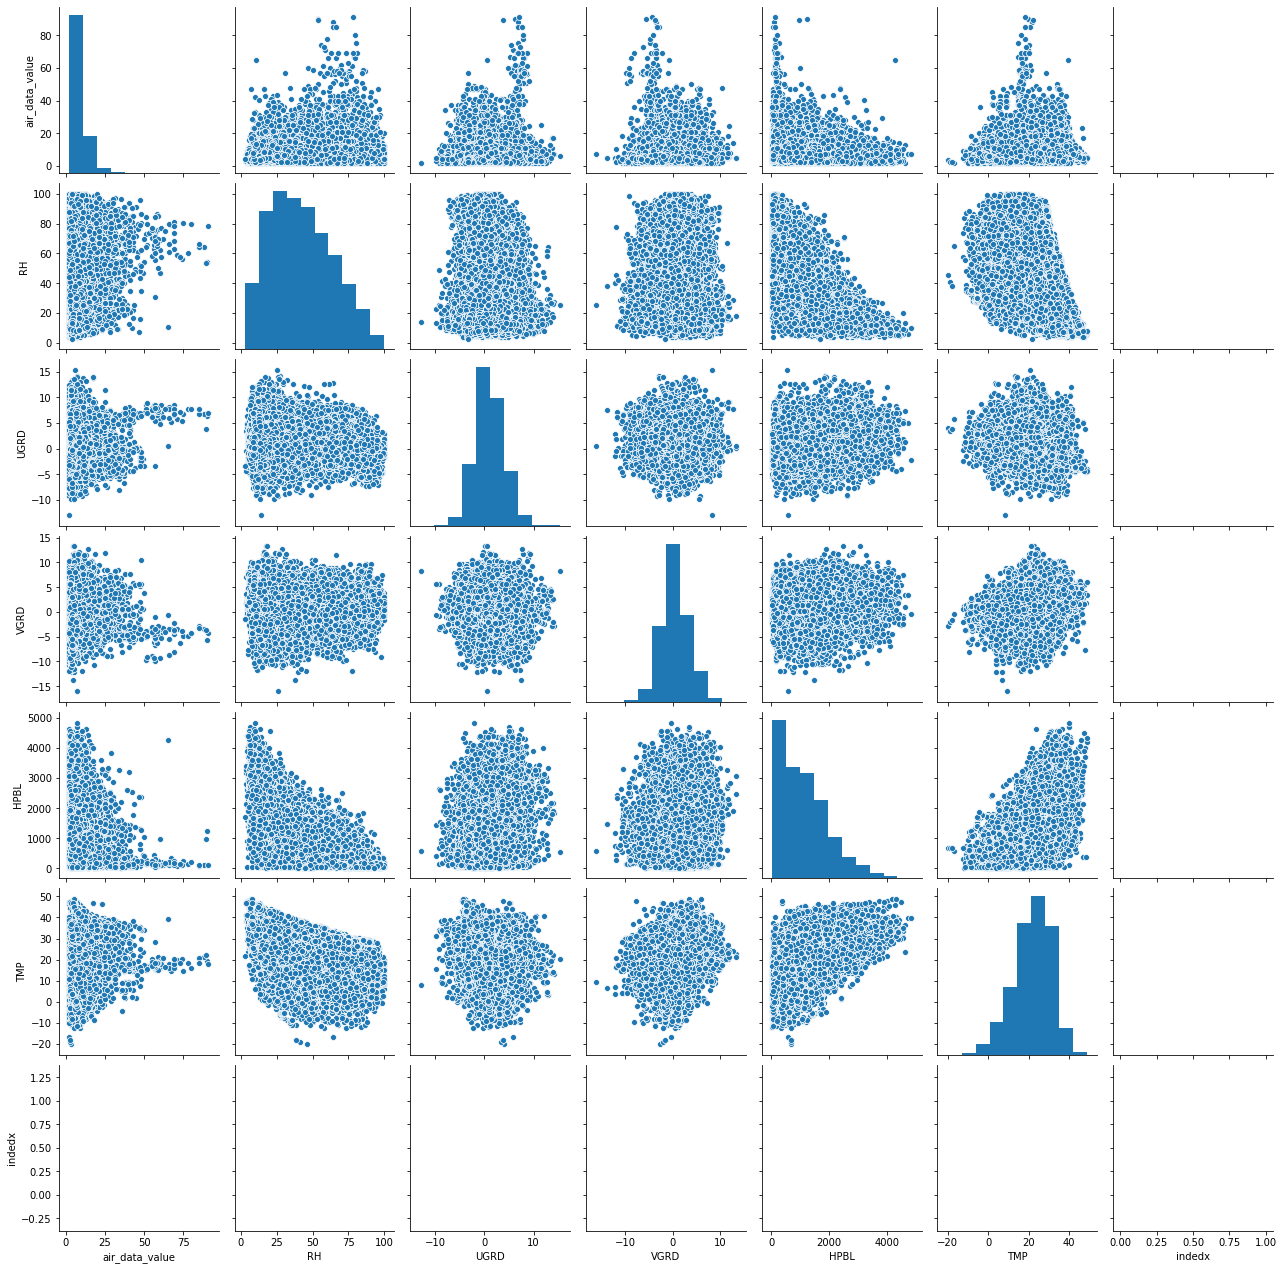

In [270]:
sns.pairplot(x)

In [286]:
names = ['PM2.5','RH','UGRD','VGRD','HPBL','TMP','AOD']
correlations = x.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

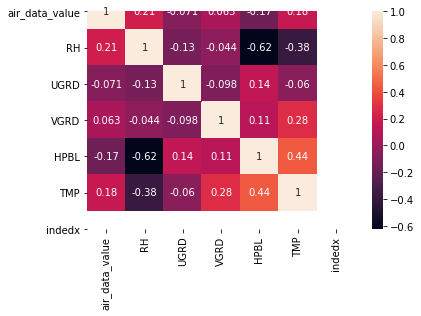

In [287]:
sns.heatmap(correlations, annot=True)

In [288]:
print(correlations)

                air_data_value        RH      UGRD      VGRD      HPBL  \
air_data_value        1.000000  0.210488 -0.071124  0.063130 -0.169982   
RH                    0.210488  1.000000 -0.128554 -0.044413 -0.622456   
UGRD                 -0.071124 -0.128554  1.000000 -0.097895  0.144502   
VGRD                  0.063130 -0.044413 -0.097895  1.000000  0.113708   
HPBL                 -0.169982 -0.622456  0.144502  0.113708  1.000000   
TMP                   0.175050 -0.378534 -0.060262  0.283796  0.436632   
indedx                     NaN       NaN       NaN       NaN       NaN   

                     TMP  indedx  
air_data_value  0.175050     NaN  
RH             -0.378534     NaN  
UGRD           -0.060262     NaN  
VGRD            0.283796     NaN  
HPBL            0.436632     NaN  
TMP             1.000000     NaN  
indedx               NaN     NaN  


In [274]:
y = data['air_data_value']
x.drop(['air_data_value'],axis=1)

,RH,UGRD,VGRD,HPBL,TMP,indedx
0,31.600000,-2.106623,-1.797583,256.61905,9.81880,NaN
1,62.200000,1.205877,1.764917,337.49405,8.63130,NaN
2,61.500000,1.518377,1.014917,270.61905,7.13130,NaN
3,15.400001,2.080877,-1.610083,1009.30660,15.19380,NaN
4,50.700000,2.393377,-1.172583,460.43155,12.19380,NaN
...,...,...,...,...,...,...
31565,25.500000,0.723850,-2.034275,892.42080,0.49664,NaN
31566,8.100000,6.964932,4.869552,1664.20080,24.60638,NaN
31567,8.900001,2.214932,4.682052,842.38837,24.60638,NaN
31568,8.300000,1.386543,5.465472,1292.07180,25.64655,NaN


In [177]:
#x.drop(['station_id','stime','index'],axis=1)

In [121]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return (h)

In [122]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) *  sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [123]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [290]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
xt_train,x_vali,yt_train,y_vali = train_test_split(x_train,y_train,test_size = 0.2,random_state=42)

In [293]:
theta, cost = linear_regression(xt_train, yt_train,0.000000001,300)
print(theta,cost)

[[2.05741558e-06 9.88683474e-05 1.85018243e-06 1.16384815e-06
  1.80456274e-03 4.69993499e-05]] [49.60201526 49.53933921 49.47690532 49.41471267 49.35276031 49.29104732
 49.22957278 49.16833575 49.10733533 49.04657059 48.98604063 48.92574454
 48.86568141 48.80585034 48.74625044 48.68688081 48.62774056 48.56882881
 48.51014466 48.45168725 48.39345569 48.33544911 48.27766663 48.2201074
 48.16277056 48.10565523 48.04876056 47.99208571 47.93562981 47.87939203
 47.82337152 47.76756743 47.71197894 47.65660521 47.60144541 47.54649871
 47.49176429 47.43724132 47.38292899 47.32882649 47.274933   47.22124771
 47.16776982 47.11449853 47.06143304 47.00857255 46.95591627 46.90346341
 46.85121318 46.7991648  46.7473175  46.69567048 46.64422298 46.59297423
 46.54192345 46.49106989 46.44041277 46.38995135 46.33968486 46.28961254
 46.23973365 46.19004745 46.14055318 46.0912501  46.04213747 45.99321456
 45.94448063 45.89593496 45.84757681 45.79940546 45.75142018 45.70362027
 45.65600499 45.60857364 45.5

In [294]:
print(theta)

[[2.05741558e-06 9.88683474e-05 1.85018243e-06 1.16384815e-06
  1.80456274e-03 4.69993499e-05]]


In [295]:
reg = LinearRegression()

In [296]:
reg.fit(xt_train,yt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg.predict(x_vali)

In [297]:
r2 = reg.score(y_vali,y_pred)
r2

ValueError: Expected 2D array, got 1D array instead:
array=[ 4.   7.   4.  ...  3.2  5.  12. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [298]:
y_pred

array([  8.09192619,  -6.07435037,   3.40937145, ..., -21.8309121 ,
         1.14858821,  12.06139865])

In [299]:
y_vali

183       4.0
15311     7.0
108       4.0
23092    12.0
30956     7.0
         ... 
6892     11.0
18268    20.0
12478     3.2
24181     5.0
9339     12.0
Name: air_data_value, Length: 5052, dtype: float64

In [245]:
len(xt_train)

20204

In [251]:
len(y_vali)

5052

In [247]:
len(x_test)

6314